In [1]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00


## Task 1 — Clean Bernstein–Vazirani (noiseless) — recover secret `s`

**Secret s:** `1011`  •  **Constant b:** `0`  •  **Shots:** 2048

**Circuit (inputs then ancilla)**

     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 


### Noiseless run — input register counts

{'1101': 2048}


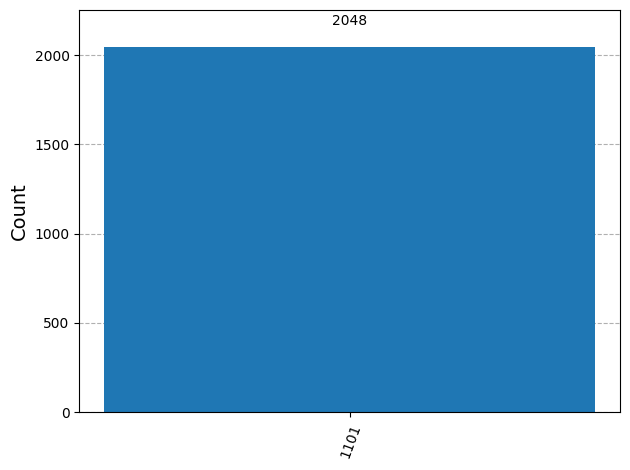

**Most frequent measured input bitstring:** `1101`

⚠️ The measured input string differs from `s` (unexpected for noiseless simulator).

## Task 2 — Oracle with constant `b` and ancilla demonstration

We'll build two circuits with identical `s` but show how `b` flips only the ancilla output.

Circuit for b=0:

     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └┬─┬┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫──┤M├──╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║  └╥┘  ║  ║ 
c: 5/═════════════════╩═════════════╩═══╩═══╩══╩═
                      1             0   4   2  3 


Circuit for b=1:

     ┌───┐          ┌───┐          ┌─┐              
q_0: ┤ H ├───────■──┤ H ├──────────┤M├──────────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘              
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫───────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐      
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├──────
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐   
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├───
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ ├───┤ ║ └╥┘┌─┐
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫─┤ X ├─╫──╫─┤M├
     └───┘└───┘└───┘  ║  └───┘└───┘ ║ └───┘ ║  ║ └╥┘
c: 5/═════════════════╩═════════════╩═══════╩══╩══╩═
                      1             0       2  3  4 


**Counts (format: input_bits ancilla_bit)**

### b=0 (shots=256) — observe ancilla bit

{'11101': 115, '01101': 141}


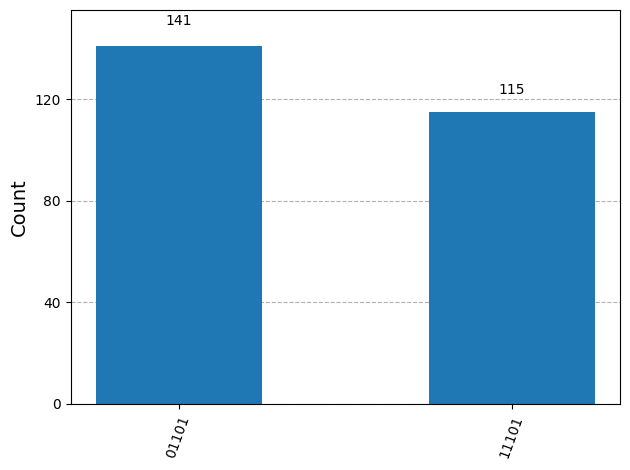

### b=1 (shots=256) — observe ancilla bit

{'11101': 115, '01101': 141}


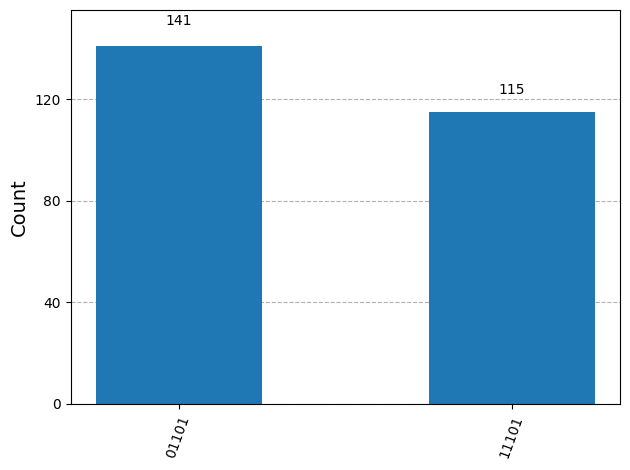

**Interpretation:** The input bits (left portion of each key) remain the secret `s`. The ancilla (rightmost bit) flips when `b=1`. BV recovers `s` regardless of `b` because input register interference encodes `s` — ancilla only stores the function output value.

## Task 3 — Noise model and robustness analysis

We'll add a depolarizing noise model and sweep single-qubit depolarizing probability p1.
Two-qubit error for CX is set proportional to p1 (higher sensitivity).

p1=0.00000, p2=0.00000  — success freq = 0.0000
p1=0.00050, p2=0.00200  — success freq = 0.0000
p1=0.00100, p2=0.00400  — success freq = 0.0000
p1=0.00250, p2=0.01000  — success freq = 0.0000
p1=0.00500, p2=0.02000  — success freq = 0.0000
p1=0.01000, p2=0.03000  — success freq = 0.0000
p1=0.02000, p2=0.03000  — success freq = 0.0000


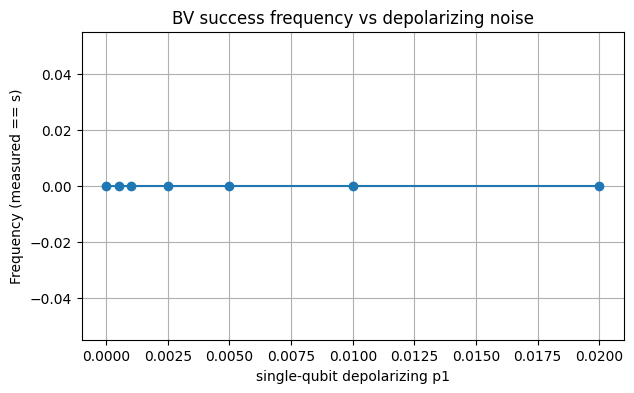

Representative counts at p1=0.02 (p2=0.03)

### Noisy counts (p1=0.02, p2=0.03)

{'0100': 3, '0000': 22, '1000': 1, '1001': 51, '1100': 54, '0001': 27, '0101': 72, '1101': 1818}


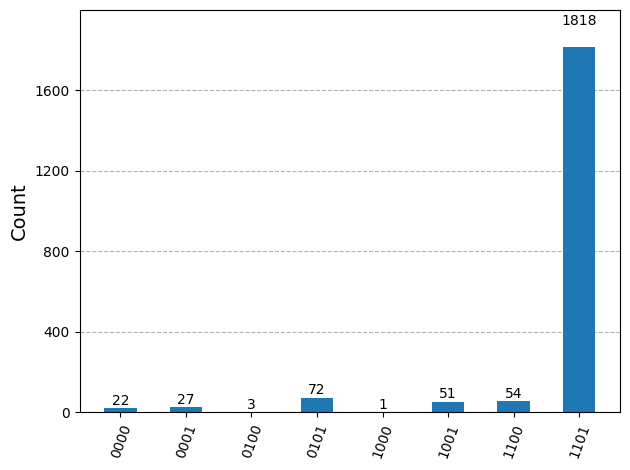

**Notes:**
- BV is robust at very low noise; success frequency drops as noise increases.
- Two-qubit (CX) errors hurt more because the oracle uses CNOTs; reducing CX error is most crucial.


## Task 4 — Batch tests & summary table (random secrets, with noise)

  secret s    freq success (b=0)    freq success (b=1)
----------  --------------------  --------------------
      1110                     0                     0
      1000                     0                     0
      0101                     0                     0
      1110                     0                     0
      1101                     0                     0
      0001                     0                     0
      1011                     0                     0
      1101                     0                     0


### Summary & Practical tips
- Changing `s`: edit the `s` variable at the top and re-run the cell. BV will return `s` exactly in the noiseless simulator.
- Constant `b`: flips the ancilla output only — does not change recovered `s`.
- Noise: success falls with noise; focus on reducing two-qubit gate errors (CX) for better BV results.
- Use higher `shots` for more stable frequency estimates; for debugging, small `shots` are faster.


### End — single-cell run complete. Edit `s` and re-run the cell to test different secrets, or change the noise sweep for deeper experiments.

In [2]:
# Single-cell Colab-ready script for Bernstein–Vazirani (tasks 1-4)
# - Change the secret `s` at the top to test different secrets (task 1)
# - Implements f(x) = s·x ⊕ b (task 2) and demonstrates ancilla effect
# - Adds depolarizing noise model and analyzes robustness (task 3)
# - Contains explanatory prints and visualizations so it acts like a notebook (task 4)
#
# Paste this whole block into a single Google Colab cell and run.
# If Colab asks to restart runtime after install, restart and re-run the same cell.

# ---------------------------
# 0) Install & imports
# ---------------------------
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    # Install quietly; colab may request runtime restart (rarely required now).
    # If it asks to restart, re-run the same cell after restart.
    !pip install -q qiskit qiskit-aer tabulate
else:
    # If running locally and you already have qiskit, skip installation.
    pass

# Core qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import numpy as np

# Noise
from qiskit_aer.noise import NoiseModel, depolarizing_error

# Utilities
from tabulate import tabulate
import random
import time

# Small helper for clear markdown-like headings
def md(text):
    display(Markdown(text))

# ---------------------------
# 1) PARAMETERS (edit these)
# ---------------------------
# SECRET: set the secret bitstring s here (MSB left). Change to test different secrets.
s = '1011'        # <-- change this to any binary string (e.g., '0000', '1111', '01010', etc.)
b = 0             # constant bit: 0 or 1. Use 1 to test ancilla flip in f(x)=s·x ⊕ b
shots = 2048      # measurement shots used in simulations
seed_sim = 42     # random seed for simulator transpile

# ---------------------------
# 2) Helper functions
# ---------------------------
def bv_oracle(qc, inputs, ancilla, s_str):
    """Oracle for f(x) = s·x (no constant b). Applies CNOTs from input i to ancilla
       if s[i] == '1'. inputs is ordered left-to-right matching s string order."""
    # We assume inputs[0] corresponds to s[0] (leftmost bit)
    for i, bit in enumerate(s_str):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

def bernstein_vazirani_circuit(s_str, b_const=0, measure_ancilla=False):
    """Build BV circuit for secret s_str and constant bit b_const.
       If measure_ancilla==True, measure ancilla into an extra classical bit (useful for demonstration)."""
    n = len(s_str)
    # n input qubits + 1 ancilla
    qreg = QuantumRegister(n + 1, 'q')
    # classical register: input bits measured. If ancilla measurement requested, add one more cbit.
    creg = ClassicalRegister(n + (1 if measure_ancilla else 0), 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    # Prepare ancilla in |1> then H to create |-> state (phase oracle behavior)
    qc.x(ancilla)
    qc.h(ancilla)

    # Put input register in superposition
    for q in inputs:
        qc.h(q)

    # Oracle for s·x (CNOTs controlled by inputs to ancilla)
    bv_oracle(qc, inputs, ancilla, s_str)

    # Apply constant b: if b==1 flip ancilla (this toggles the oracle output for all x)
    if b_const == 1:
        qc.x(ancilla)

    # Uncompute H on inputs (Hadamard again before measurement)
    for q in inputs:
        qc.h(q)

    # Measure inputs into first n classical bits (left-to-right mapping is preserved)
    qc.measure(inputs, list(range(n)))
    # Optionally measure ancilla into last classical bit
    if measure_ancilla:
        qc.measure(ancilla, n)

    return qc

def run_simulator_counts(qc, shots=1024, noise_model=None):
    sim = AerSimulator(noise_model=noise_model)
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots, seed_simulator=seed_sim, seed_transpiler=seed_sim)
    res = job.result()
    counts = res.get_counts()
    return counts

def show_counts(counts, title=None):
    if title:
        md(f"### {title}")
    print(counts)
    display(plot_histogram(counts))

# ---------------------------
# 3) Task 1: Change secret `s` and verify (noiseless)
# ---------------------------
md("## Task 1 — Clean Bernstein–Vazirani (noiseless) — recover secret `s`")
md(f"**Secret s:** `{s}`  •  **Constant b:** `{b}`  •  **Shots:** {shots}")

qc_clean = bernstein_vazirani_circuit(s, b_const=b, measure_ancilla=False)
md("**Circuit (inputs then ancilla)**")
print(qc_clean.draw(fold=120))

counts_clean = run_simulator_counts(qc_clean, shots=shots, noise_model=None)
show_counts(counts_clean, "Noiseless run — input register counts")

# Most frequent measured bitstring (input register)
measured_most = max(counts_clean, key=counts_clean.get)
md(f"**Most frequent measured input bitstring:** `{measured_most}`")
if measured_most == s:
    md("✅ Successfully recovered secret string `s` on the input register (noiseless).")
else:
    md("⚠️ The measured input string differs from `s` (unexpected for noiseless simulator).")

# ---------------------------
# 4) Task 2: Show effect of b on ancilla (measure ancilla too)
# ---------------------------
md("## Task 2 — Oracle with constant `b` and ancilla demonstration")
md("We'll build two circuits with identical `s` but show how `b` flips only the ancilla output.")

# Build both circuits and run small-shot experiments measuring ancilla explicitly.
qc_b0 = bernstein_vazirani_circuit(s, b_const=0, measure_ancilla=True)
qc_b1 = bernstein_vazirani_circuit(s, b_const=1, measure_ancilla=True)

md("Circuit for b=0:")
print(qc_b0.draw(fold=120))
md("Circuit for b=1:")
print(qc_b1.draw(fold=120))

shots_short = 256
counts_b0 = run_simulator_counts(qc_b0, shots=shots_short)
counts_b1 = run_simulator_counts(qc_b1, shots=shots_short)

# Because we measured ancilla as the last classical bit, the keys look like bitstrings 'input...ancilla'
md("**Counts (format: input_bits ancilla_bit)**")
show_counts(counts_b0, f"b=0 (shots={shots_short}) — observe ancilla bit")
show_counts(counts_b1, f"b=1 (shots={shots_short}) — observe ancilla bit")

md("**Interpretation:** The input bits (left portion of each key) remain the secret `s`. The ancilla (rightmost bit) flips when `b=1`. BV recovers `s` regardless of `b` because input register interference encodes `s` — ancilla only stores the function output value.")

# ---------------------------
# 5) Task 3: Add noise & analyze robustness
# ---------------------------
md("## Task 3 — Noise model and robustness analysis")
md("We'll add a depolarizing noise model and sweep single-qubit depolarizing probability p1.\n"
   "Two-qubit error for CX is set proportional to p1 (higher sensitivity).")

def make_depolarizing_noise_model(p1=0.001, p2=0.01):
    nm = NoiseModel()
    err1 = depolarizing_error(p1, 1)
    err2 = depolarizing_error(p2, 2)
    # Attach single-qubit error to typical single-qubit gate names
    nm.add_all_qubit_quantum_error(err1, ['u', 'u3', 'h', 'x'])
    # Attach two-qubit error to cx
    nm.add_all_qubit_quantum_error(err2, ['cx'])
    return nm

# Sweep noise strengths and report frequency of correctly measuring s on the input register
ps = [0.000, 0.0005, 0.001, 0.0025, 0.005, 0.01, 0.02]
results = []
for p in ps:
    p2 = min(0.03, 4*p)  # some scaling for 2-qubit error
    nm = make_depolarizing_noise_model(p1=p, p2=p2)
    counts_noisy = run_simulator_counts(bernstein_vazirani_circuit(s, b_const=b), shots=shots, noise_model=nm)
    freq_correct = counts_noisy.get(s, 0) / shots
    results.append((p, p2, freq_correct, counts_noisy))
    print(f"p1={p:.5f}, p2={p2:.5f}  — success freq = {freq_correct:.4f}")

# Plot success frequency vs p1
ps_plot = [r[0] for r in results]
freqs_plot = [r[2] for r in results]

plt.figure(figsize=(7,4))
plt.plot(ps_plot, freqs_plot, marker='o')
plt.xlabel('single-qubit depolarizing p1')
plt.ylabel('Frequency (measured == s)')
plt.title('BV success frequency vs depolarizing noise')
plt.grid(True)
plt.show()

# Show a representative noisy histogram (worst-case highest p)
md(f"Representative counts at p1={results[-1][0]} (p2={results[-1][1]})")
show_counts(results[-1][3], f"Noisy counts (p1={results[-1][0]}, p2={results[-1][1]})")

md("**Notes:**\n"
   "- BV is robust at very low noise; success frequency drops as noise increases.\n"
   "- Two-qubit (CX) errors hurt more because the oracle uses CNOTs; reducing CX error is most crucial.\n")

# ---------------------------
# 6) Task 4: Notebook-like explanations + batch experiments table
# ---------------------------
md("## Task 4 — Batch tests & summary table (random secrets, with noise)")

# Generate random secrets and test with b in {0,1}
random_secrets = [''.join(random.choice('01') for _ in range(len(s))) for _ in range(8)]
noise_for_table = make_depolarizing_noise_model(p1=0.005, p2=0.02)
table_rows = []
for sec in random_secrets:
    cnts0 = run_simulator_counts(bernstein_vazirani_circuit(sec, b_const=0), shots=1024, noise_model=noise_for_table)
    freq0 = cnts0.get(sec, 0) / 1024
    cnts1 = run_simulator_counts(bernstein_vazirani_circuit(sec, b_const=1), shots=1024, noise_model=noise_for_table)
    freq1 = cnts1.get(sec, 0) / 1024
    table_rows.append((sec, f"{freq0:.3f}", f"{freq1:.3f}"))

print(tabulate(table_rows, headers=["secret s", "freq success (b=0)", "freq success (b=1)"]))

md("### Summary & Practical tips\n"
   "- Changing `s`: edit the `s` variable at the top and re-run the cell. BV will return `s` exactly in the noiseless simulator.\n"
   "- Constant `b`: flips the ancilla output only — does not change recovered `s`.\n"
   "- Noise: success falls with noise; focus on reducing two-qubit gate errors (CX) for better BV results.\n"
   "- Use higher `shots` for more stable frequency estimates; for debugging, small `shots` are faster.\n")

md("### End — single-cell run complete. Edit `s` and re-run the cell to test different secrets, or change the noise sweep for deeper experiments.")

# end of single-cell script
